In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pe-files-malwares/dataset_test.csv
/kaggle/input/pe-files-malwares/dataset_malwares.csv


In [38]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [39]:
df = pd.read_csv('/kaggle/input/pe-files-malwares/dataset_malwares.csv')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [41]:
dropped_df = df.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

In [42]:
print(df['Malware'].unique())

[1 0]


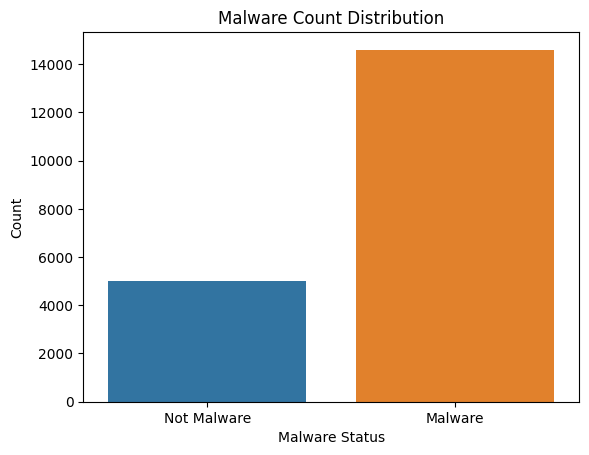

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the countplot
ax = sns.countplot(x=df['Malware'])

# Set custom tick labels for the x-axis
ax.set_xticklabels(['Not Malware', 'Malware'])

# Add a title and labels for clarity
plt.title("Malware Count Distribution")
plt.xlabel("Malware Status")
plt.ylabel("Count")

# Show the plot
plt.show()


In [44]:
X = dropped_df
y = df['Malware']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
15814,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,7,94,3,153504,168752,172032,159744,0
3268,23117,144,3,0,4,0,65535,0,184,0,...,3221225600,0,8,155,0,0,29872,1187840,0,0
10898,23117,144,3,0,4,0,65535,0,184,0,...,3758096512,0,9,14,0,0,781148,774144,0,346112
12158,23117,144,3,0,4,0,65535,0,184,0,...,3221225600,0,0,0,0,0,29604,184320,0,0
13942,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,8,39,0,0,42688,221184,0,0


In [45]:
print("Number of used features:", X_train.shape[1])

Number of used features: 75


In [46]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(
    n_estimators=100,        # Set the number of trees to 100
    random_state=0,          # Set the random state to ensure reproducibility
    oob_score=True,          # Enable the out-of-bag (OOB) score
    max_depth=16             # Set the maximum depth of the trees to 16
)

# Fit the classifier to the training data
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [47]:
y_pred = clf.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred, target_names=['Not Malware', 'Malware']))

              precision    recall  f1-score   support

 Not Malware       0.99      0.96      0.98      1003
     Malware       0.99      1.00      0.99      2920

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



<Axes: >

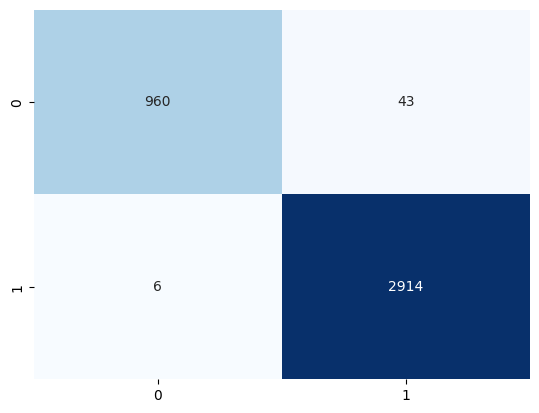

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [51]:
X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_new.head()


,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,0.0,-0.033832,-0.046612,-0.040348,-0.038197,-0.040872,0.151401,-0.017371,-0.034526,-0.028972,...,0.098957,0.0,0.113955,-0.057648,-0.070912,-0.005963,-0.046451,-0.052476,-0.017685,-0.039603
1,0.0,-0.033832,-0.046612,-0.040348,-0.038197,-0.040872,0.151401,-0.017371,-0.034526,-0.028972,...,0.098958,0.0,0.241250,0.434493,-0.089676,-0.014817,-0.073256,0.083185,-0.020496,-0.039603
2,0.0,-0.033832,-0.046612,-0.040348,-0.038197,-0.040872,0.151401,-0.017371,-0.034526,-0.028972,...,1.013585,0.0,0.368544,-0.703078,-0.089676,-0.014817,0.071744,0.027936,-0.020496,-0.022263
3,0.0,-0.033832,-0.046612,-0.040348,-0.038197,-0.040872,0.151401,-0.017371,-0.034526,-0.028972,...,0.098958,0.0,-0.777108,-0.816029,-0.089676,-0.014817,-0.073307,-0.050835,-0.020496,-0.039603
4,0.0,-0.033832,-0.046612,-0.040348,-0.038197,-0.040872,0.151401,-0.017371,-0.034526,-0.028972,...,0.098957,0.0,0.241250,-0.501381,-0.089676,-0.014817,-0.070782,-0.045912,-0.020496,-0.039603


In [52]:
skpca = PCA(n_components=55)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

Variance sum :  0.9890190185350649


In [53]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix
model = RFC(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16, 
                         max_features = 'sqrt')
model.fit(X_pca, y_train)

X_test_scaled = scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_pca = skpca.transform(X_test_new)

y_pred = model.predict(X_test_pca)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1003
           1       0.98      0.99      0.99      2920

    accuracy                           0.98      3923
   macro avg       0.98      0.97      0.97      3923
weighted avg       0.98      0.98      0.98      3923



<Axes: >

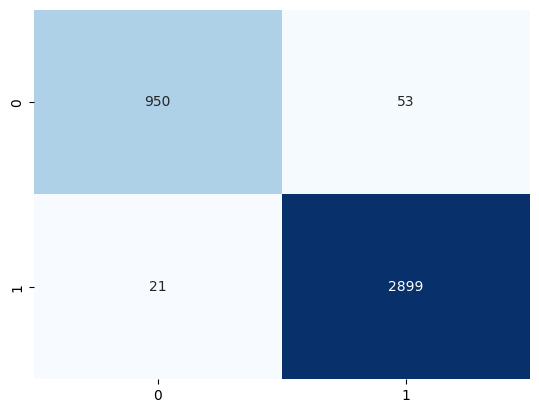

In [54]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)

Best Parameters from GridSearchCV: {'max_depth': 32, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Test Accuracy: 0.99

Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1003
           1       0.99      1.00      0.99      2920

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.99      3923
weighted avg       0.99      0.99      0.99      3923



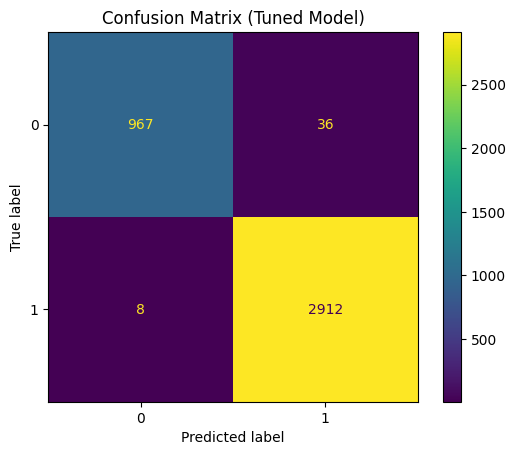

In [56]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [8, 16, 32, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters from GridSearchCV: {best_params}")

# Train the model with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Evaluate the tuned model on the test set
y_test_pred_best = best_clf.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

# Output evaluation results
print(f"Tuned Test Accuracy: {test_accuracy_best:.2f}")
print("\nClassification Report (Tuned Model):\n", classification_report(y_test, y_test_pred_best))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_clf, X_test, y_test)
plt.title("Confusion Matrix (Tuned Model)")
plt.show()